In [24]:
!pip install --upgrade pandas_datareader

In [25]:
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

In [26]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start = start, end = end)
    returns = stockData["Close"].pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['JPM', 'AAPL', 'CMG', 'HUBS', 'NKE', 'NVDA']
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=365)

meanReturns, covMatrix = get_data(stockList, startDate, endDate)

[*********************100%%**********************]  6 of 6 completed


In [27]:
#Assign Random weights for now, will add in covariance later on
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

In [28]:
#Monte Carlo
mc_sims = 100
timeframe = 365 #in days

meanMatrix = np.full(shape = (timeframe, len(meanReturns)), fill_value = meanReturns)
meanMatrix = meanMatrix.T

simulations = np.full(shape = (timeframe, mc_sims),fill_value = 0.0 )
startingPortfolio = 10000



In [29]:
#Assuming multivariate normal distribution
for i in range(mc_sims):
  samples = np.random.normal(size = (timeframe, len(meanReturns)))
  lowerTriangle = np.linalg.cholesky(covMatrix) #Calculate using Chloesky decompostion, in order incorporate covariances with uncorrelated random samples
  dailyReturns = meanMatrix + np.inner(lowerTriangle, samples) #Samples is timeframe by number of stocks, lowerTriangle is number of stocks by number of stocks
  simulations[:,i] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) + startingPortfolio #Adding one because we need to calculate the growth rate

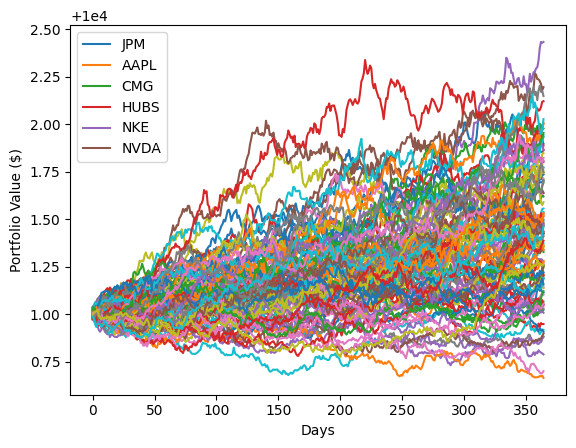

In [30]:
plt.plot(simulations)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.legend(stockList)
plt.show()